# SMAI Assignment - 2

## Question 4: Multi-layer Perceptrons

### Digit Classification

In this question, you will perform digit classification using MLP. You can use the MLPClassifier from sklearn. Train and two test sets have been provided [here](https://drive.google.com/drive/folders/1OUVrOMp2jSSBDJSqvEyXDFTrhiyZnqit?usp=sharing). Report the accuracy and any other interesting observations.

In [2]:
import numpy as np
import h5py

In [3]:
filename = "training_3digits.hdf5"
train = h5py.File(filename,'r')
train_images = np.array(train['images'])
train_digits = np.array(train['digits'])
train.close()

print(train_images.shape)
print(train_digits.shape)

(2726, 28, 28, 3)
(2726,)


Train images are total of 2726 , each be like 28*28*3. Since there are three channels.
Train digits are total of 2726, each corresponding to digit in the photo.



In [4]:
filename = "testing_3digits_part1.hdf5"
test1 = h5py.File(filename,'r')
test_images_1 = np.array(test1['images'])
test_digits_1 = np.array(test1['digits'])
test1.close()

print(test_images_1.shape)
print(test_digits_1.shape)


(3147, 28, 28, 3)
(3147,)


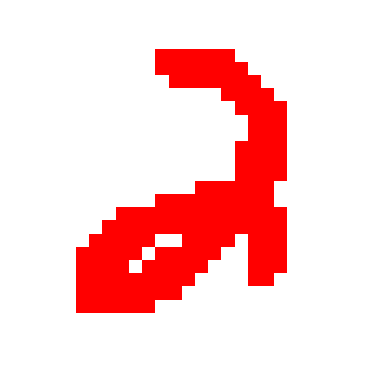

In [12]:
# display the train image [1] using plot
import matplotlib.pyplot as plt
plt.imshow(train_images[1])
plt.axis('off')
plt.show()

Test Images are total of 3147 ,each be like 28*28*3. Since there are three channels.
Test digits are total of 3147, each corresponding to digit in the photo.

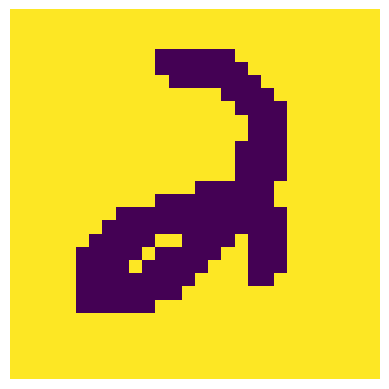

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# flatten the images for input to the MLP
# Flatten the images for MLP input
gray_train_images = np.dot(train_images[..., :3], [0.299, 0.587, 0.114])
gray_test_images= np.dot(test_images_1[..., :3], [0.299, 0.587, 0.114])

# Visualize a few grayscale images

plt.imshow(gray_train_images[1])
plt.axis('off')
plt.show()

# Flatten the images for MLP input
gray_images_flattened = gray_train_images.reshape((gray_train_images.shape[0], -1))
gray_test_images_flattened = gray_test_images.reshape((gray_test_images.shape[0], -1))




In [16]:
# Train MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
mlp.fit(gray_images_flattened, train_digits)


MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

In [17]:
print(accuracy_score(test_digits_1, mlp.predict(gray_test_images_flattened)))


0.9936447410231967


In [18]:
filename = "testing_3digits_part2.hdf5"
test2 = h5py.File(filename,'r')
test_images_2 = np.array(test2['images'])
test_digits_2 = np.array(test2['digits'])
test2.close()

print(test_images_2.shape)
print(test_digits_2.shape)

(3147, 28, 28, 3)
(3147,)


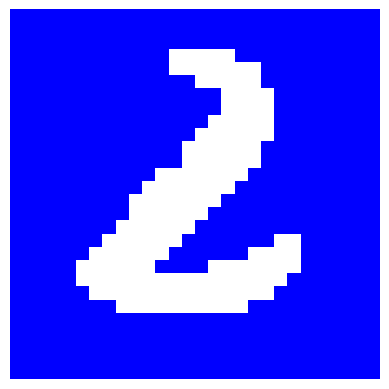

0.3606609469335875


In [20]:
plt.imshow(test_images_2[1])
plt.axis('off')
plt.show()

test_images2= np.dot(test_images_2[..., :3], [0.299, 0.587, 0.114])
test_images_flattened2 = test_images2.reshape((test_images2.shape[0], -1))

print(accuracy_score(test_digits_2, mlp.predict(test_images_flattened2)))

